In [69]:
import timeit
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Clean and tokenize text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords') # download stopwords corpus
nltk.download('punkt') # download punkt tokenizer

# For linear regression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Hannah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Hannah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Set directory

In [92]:
%cd /Users/Hannah/Documents/VU/Msc/Thesis/Coding/Pipeline

/Users/Hannah/Documents/VU/Msc/Thesis/Coding/Pipeline


## Combine data files into one csv file 

In [71]:
def combine_csv_files(folder_path):
    """Combines CSV files in a folder with identical structures and creates a new ID column."""
    # Get all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    # Read each CSV file and concatenate them
    df_list = []
    for file in csv_files:
        filepath = os.path.join(folder_path, file)
        df = pd.read_csv(filepath)
        df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    # Create a new ID column
    combined_df['new_id'] = combined_df.index + 1
    # Return the combined dataframe
    return combined_df

In [152]:
#df = pd.read_csv('/Users/Hannah/Documents/VU/Msc/Thesis/Data/VK1k_04-12.csv')

In [153]:
def add_columns(df, col1, col2, new_col_name):
    df[new_col_name] = df[col1] + df[col2]
    return df

df = add_columns(df, 'likes', 'loves', 'like')
df = df.drop(columns=['video', 'image', 'id', 'likes', 'loves'])

#df = df[df['reactions_count'] > 40]


## Calculate Entropy 

In [154]:
reaction_columns = ["like", "wow", "cares", "sad", "angry", "haha"]
total_reactions = "reactions_count"

# Define a function to calculate the entropy
def calculate_entropy(row):
    # Get the reaction counts for the row
    counts = row[reaction_columns].values
    #print(counts)
    # Normalize the counts to probabilities
    eps = 1e-8 # a very small positive number
    probabilities = (counts.astype(float) + eps) / (row[total_reactions] + len(reaction_columns) * eps)

    #probabilities = counts.astype(float) / row[total_reactions]
    
    # Calculate the entropy
    return entropy(probabilities)

df["entropy"] = df.apply(calculate_entropy, axis=1)


In [155]:
# Length analysis of the text data
df['word_count'] = df["content"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["content"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["content"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_length'] = df['word_count'] / df['sentence_count']
df.head()

,name,shares,wow,cares,sad,angry,haha,reactions_count,comments,content,posted_on,post_url,like,entropy,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length
0,de Volkskrant,0,0,7,7,0,0,18,0,"Na de zelfdoding van Arie blijven vader, moede...",2023-04-12T14:12:34.367331,https://www.facebook.com/volkskrant/posts/pfbi...,4,1.068821,38,181,3,4.763158,12.666667
1,de Volkskrant,1,0,0,0,0,4,13,19,Betogers verstoorden in Den Haag een lezing va...,2023-04-12T13:50:34.430591,https://www.facebook.com/volkskrant/posts/pfbi...,9,0.617242,26,166,4,6.384615,6.500000
2,de Volkskrant,0,1,0,2,0,0,4,0,Tal van Chinese kunstenaars hebben de voorbije...,2023-04-12T12:50:34.490487,https://www.facebook.com/volkskrant/posts/pfbi...,1,1.039721,28,158,4,5.642857,7.000000
3,de Volkskrant,3,0,0,8,2,0,11,32,In Cambodja leiden microleningen tot schrijnen...,2023-04-12T11:50:34.560674,https://www.facebook.com/volkskrant/posts/pfbi...,1,0.759547,33,196,4,5.939394,8.250000
4,de Volkskrant,0,3,0,0,0,2,10,43,Gemeenten weten jongeren die recht hebben op b...,2023-04-12T09:50:34.699263,https://www.facebook.com/volkskrant/posts/pfbi...,5,1.029653,19,108,2,5.684211,9.500000


## Descriptive statistics

In [156]:

# Get descriptive statistics
def descriptive_Entropy(dataframe):
    print(dataframe.describe())
    return 

# Plot descriptive statistics
def plot_descriptive_stats(dataframe, figsize=(10, 8)):
    """
    Generate visually appealing plots of descriptive statistics for a pandas DataFrame.
    
    Parameters:
        dataframe (pandas DataFrame): The input DataFrame to generate plots for.
        figsize (tuple): The size of the figure to be plotted.
    
    """
    # Calculate descriptive statistics
    desc_stats = dataframe.describe()
    
    #if not os.path.exists("Plots_VK"):
        #os.makedirs("Plots_VK")
    
    # Plot histogram for each numerical column
    for col in desc_stats.columns:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            fig, ax = plt.subplots(figsize=figsize)
            sns.histplot(data=dataframe, x=col, kde=True, color="skyblue", alpha=0.8)
            ax.set_xlabel(col.capitalize())
            ax.set_ylabel("Frequency")
            ax.set_title(f"Histogram of {col.capitalize()}")
            #plt.savefig(f"Plots_VK/histogram_{col}.png")  # Save the plot as an image file
            plt.show()
    
    # Plot boxplot for each numerical column
    for col in desc_stats.columns:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            fig, ax = plt.subplots(figsize=figsize)
            sns.boxplot(data=dataframe, x=col, color="skyblue", width=0.5, fliersize=3)
            ax.set_xlabel(col.capitalize())
            ax.set_ylabel("Value")
            ax.set_title(f"Boxplot of {col.capitalize()}")
            #plt.savefig(f"Plots_VK/boxplot_{col}.png")  # Save the plot as an image file
            plt.show()
    
    # Plot countplot for each categorical column
    for col in desc_stats.columns:
        if pd.api.types.is_categorical_dtype(dataframe[col]):
            fig, ax = plt.subplots(figsize=figsize)
            sns.countplot(data=dataframe, x=col, color="skyblue")
            ax.set_xlabel(col.capitalize())
            ax.set_ylabel("Count")
            ax.set_title(f"Countplot of {col.capitalize()}")
            #plt.savefig(f"Plots_VK/countplot_{col}.png")  # Save the plot as an image file
            plt.show()

            shares          wow        cares          sad        angry   
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  \
mean      5.159000     1.350000     6.145000     4.227000     2.244000   
std      42.869704    12.702868    44.626556    30.184343    11.130694   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       3.000000     0.000000     0.000000     0.000000     0.000000   
max    1300.000000   371.000000   730.000000   574.000000   149.000000   

              haha  reactions_count     comments         like       entropy   
count  1000.000000       1000.00000  1000.000000  1000.000000  1.000000e+03  \
mean      8.316000         64.52100    62.760000    42.239000  5.646481e-01   
std      26.702381        145.23178   119.324124   103.928605  3.784849e-01   
min       0.00000

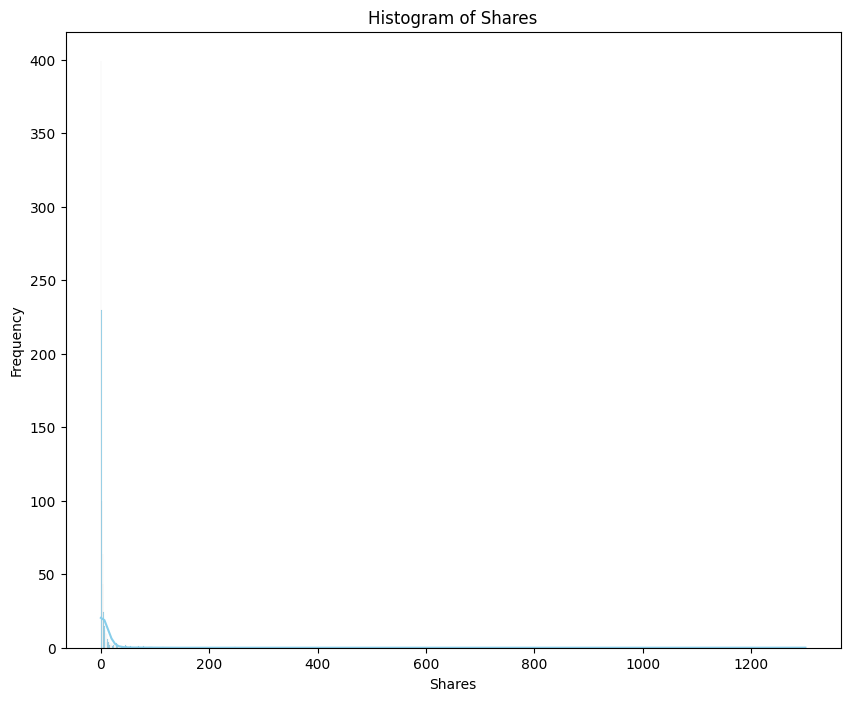

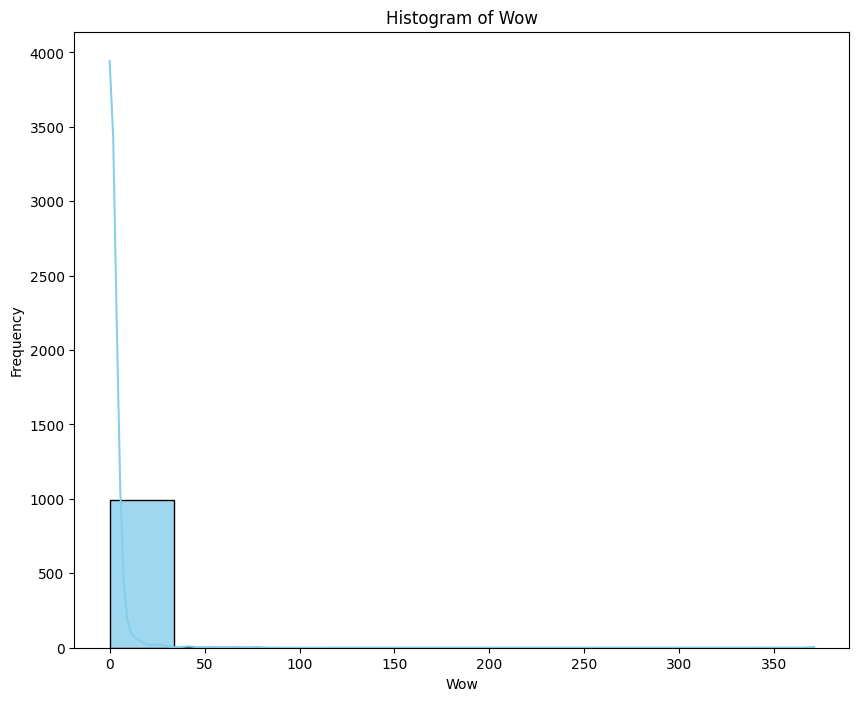

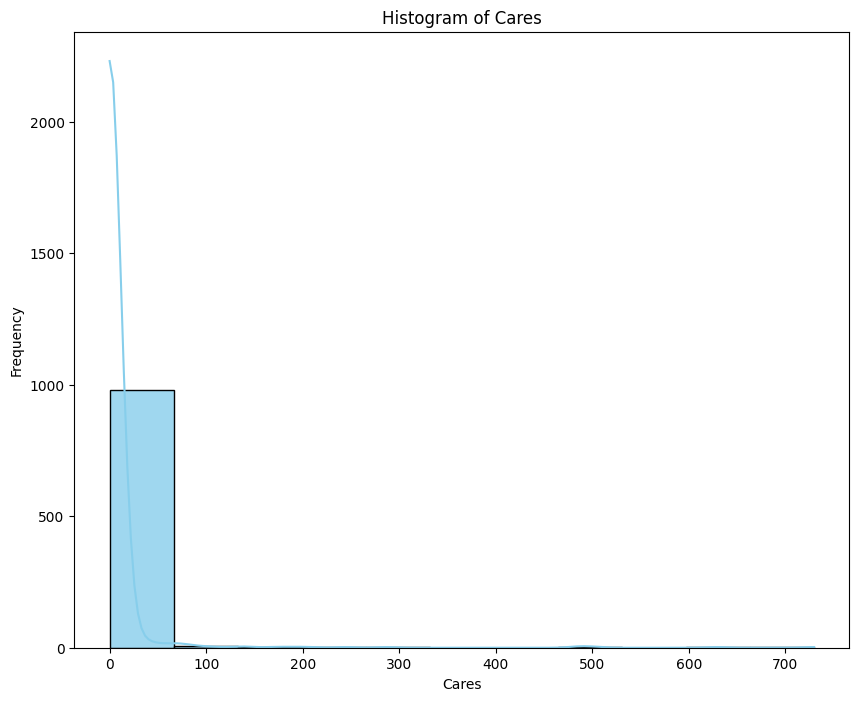

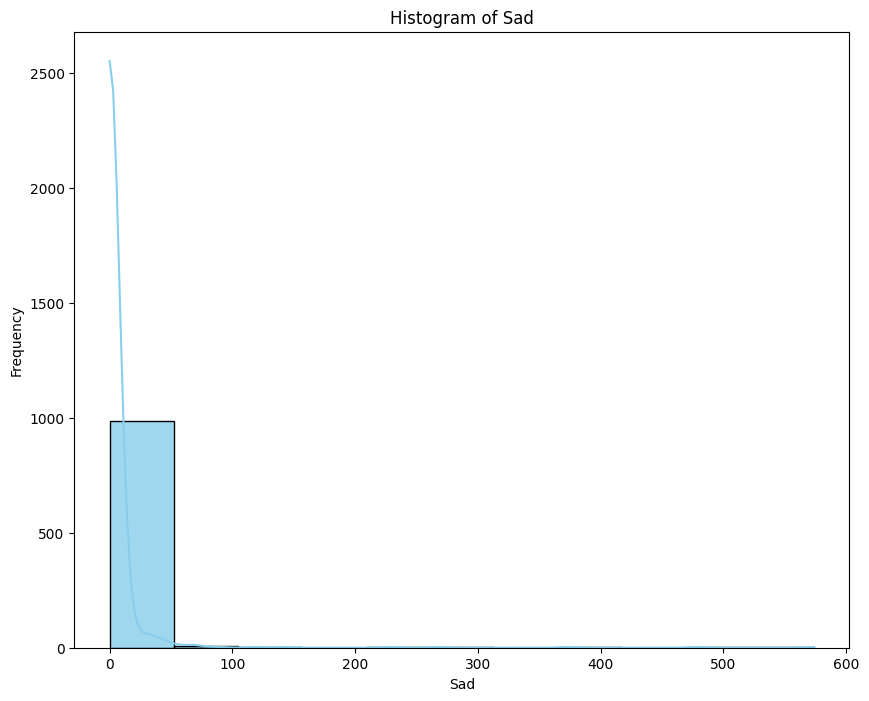

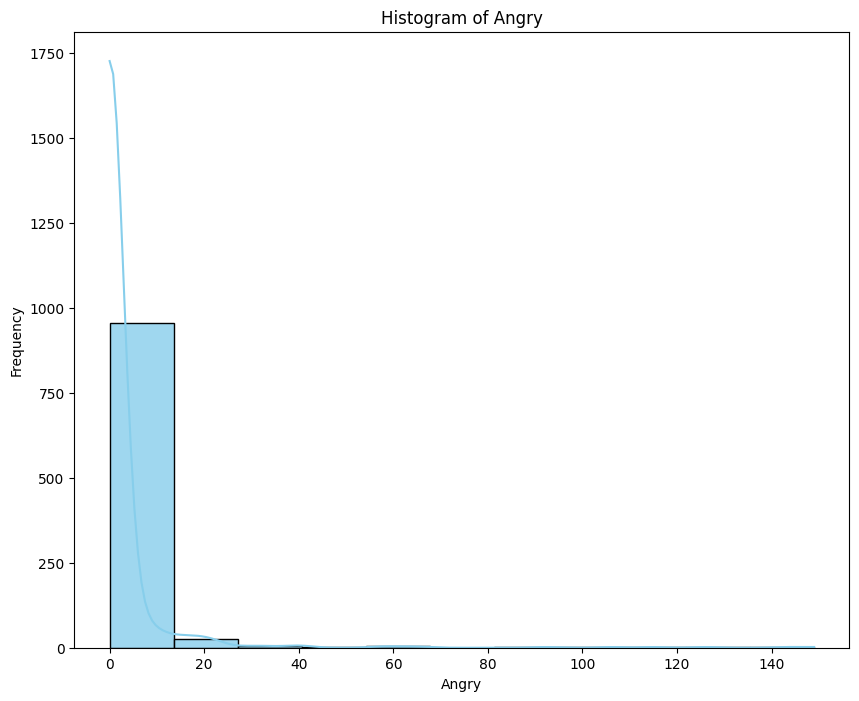

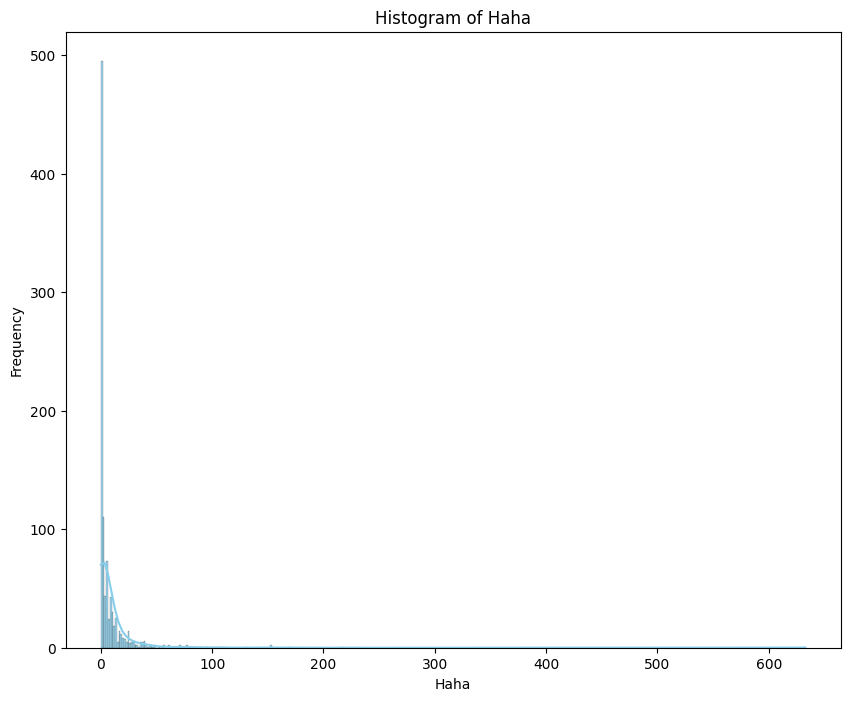

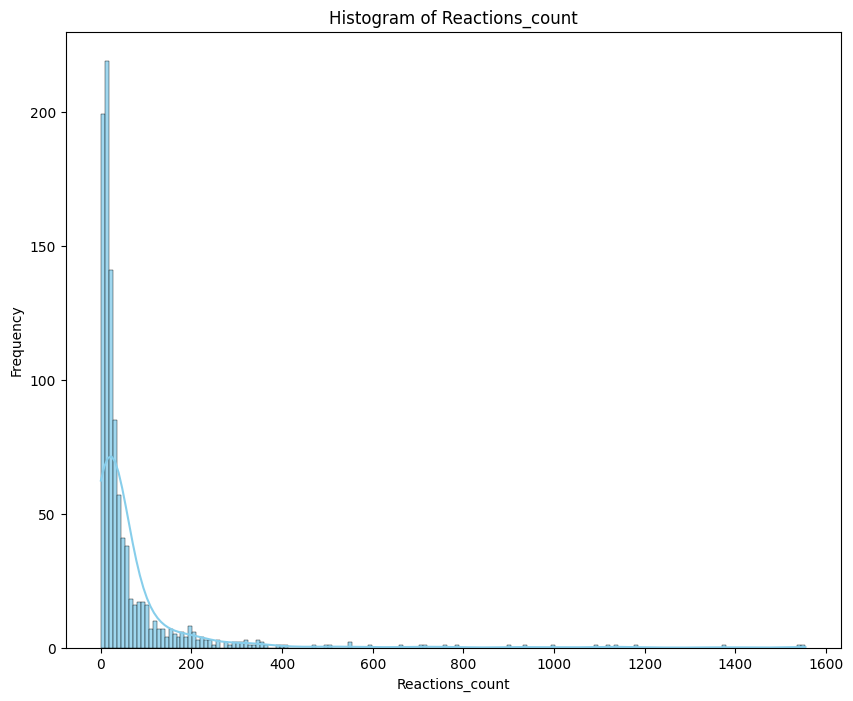

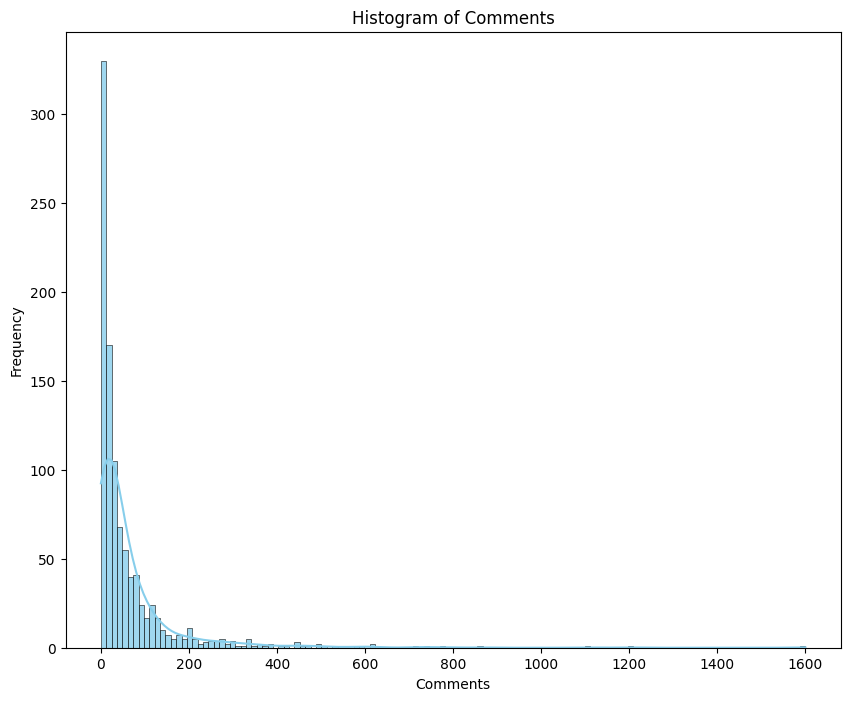

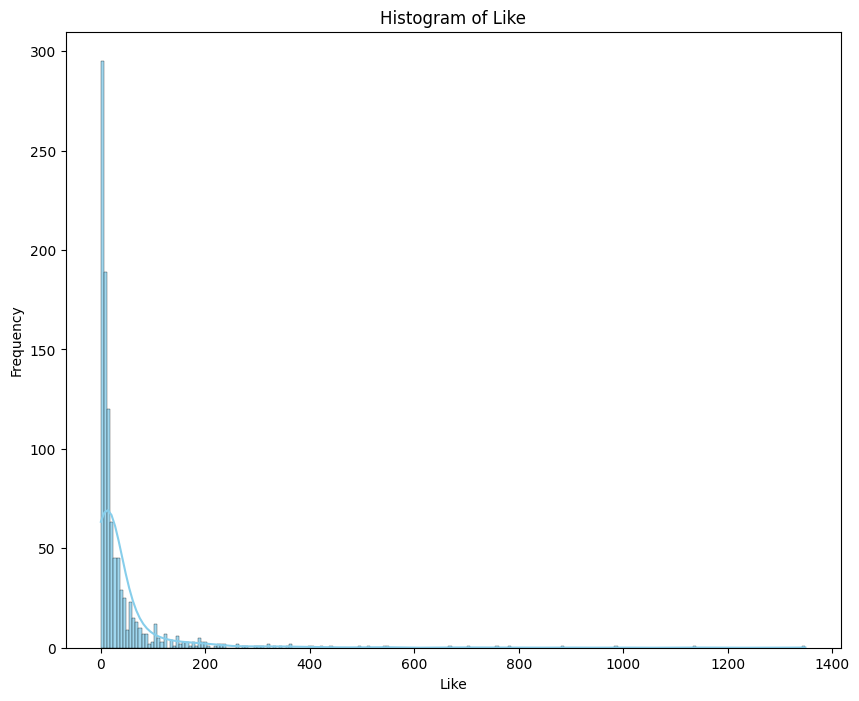

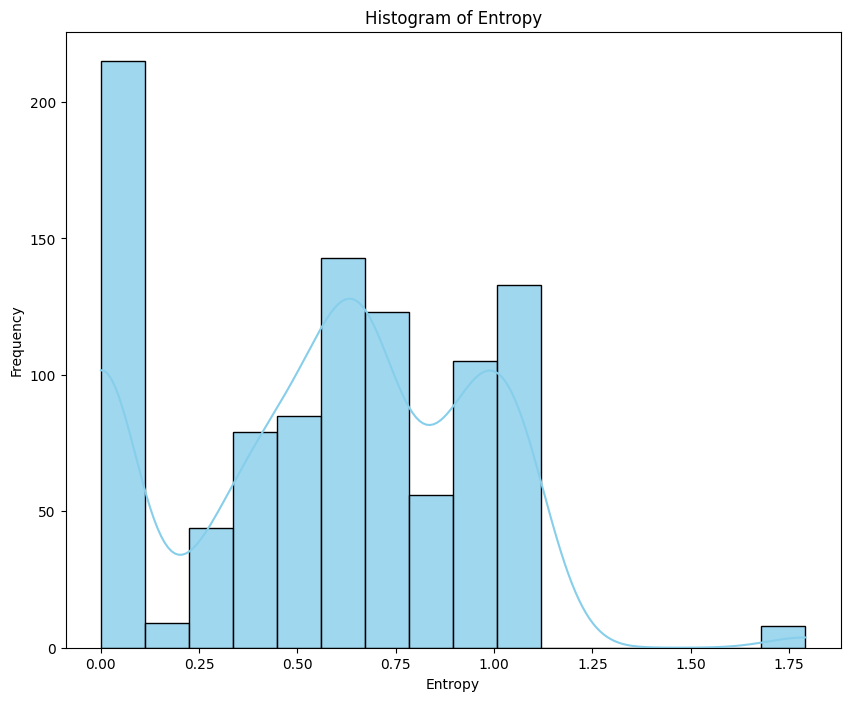

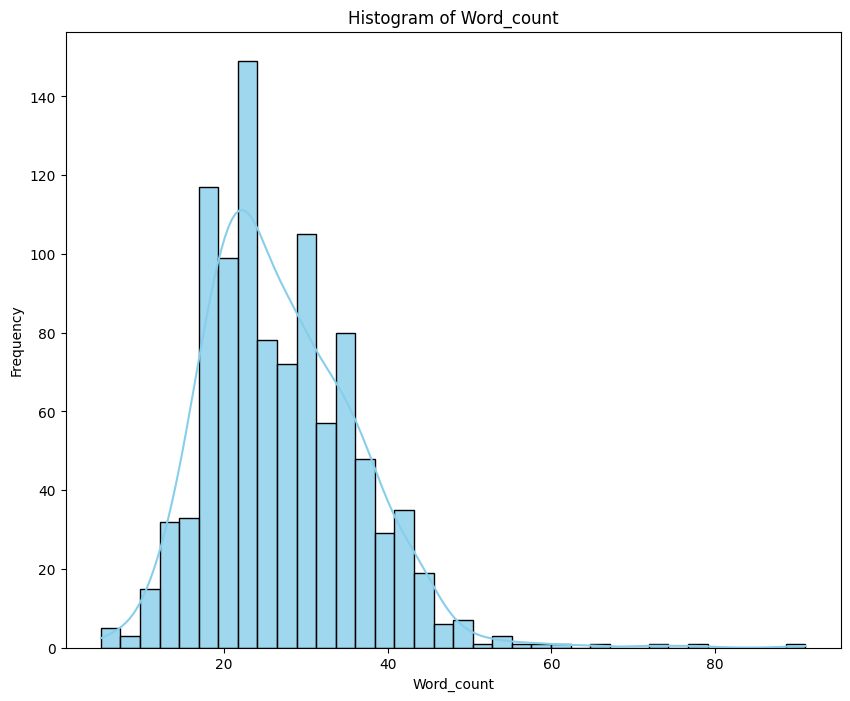

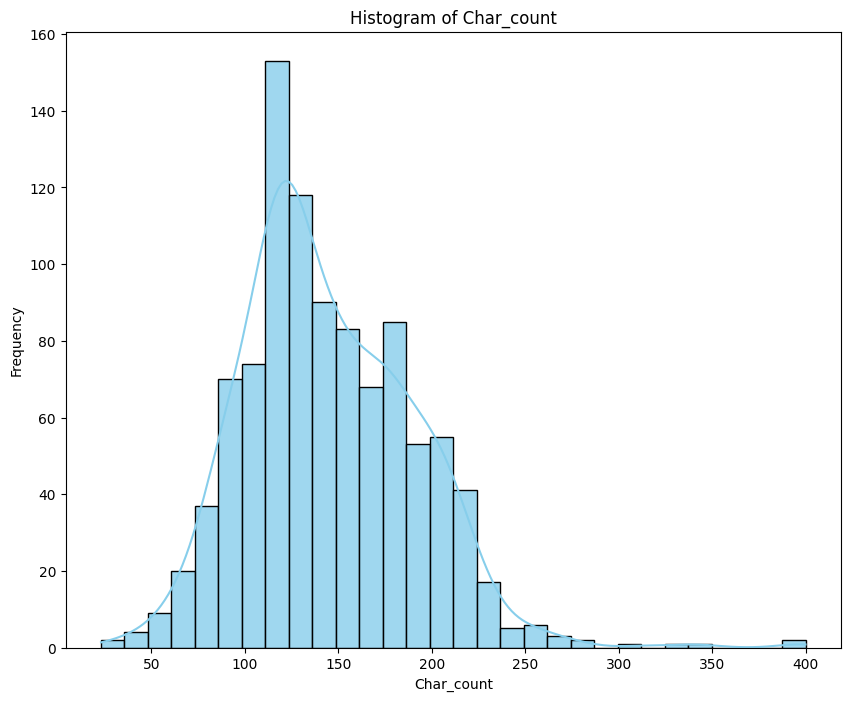

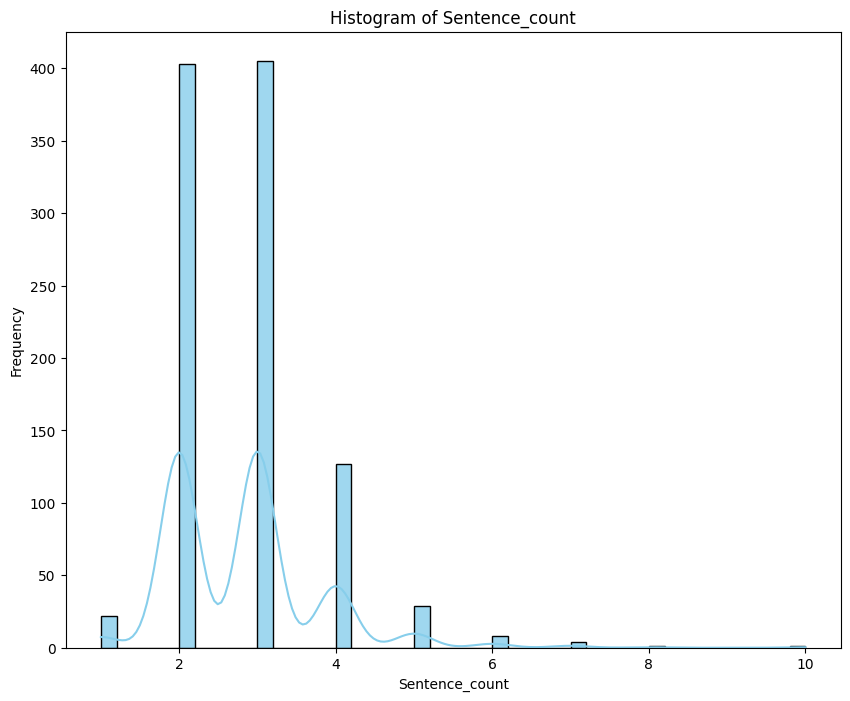

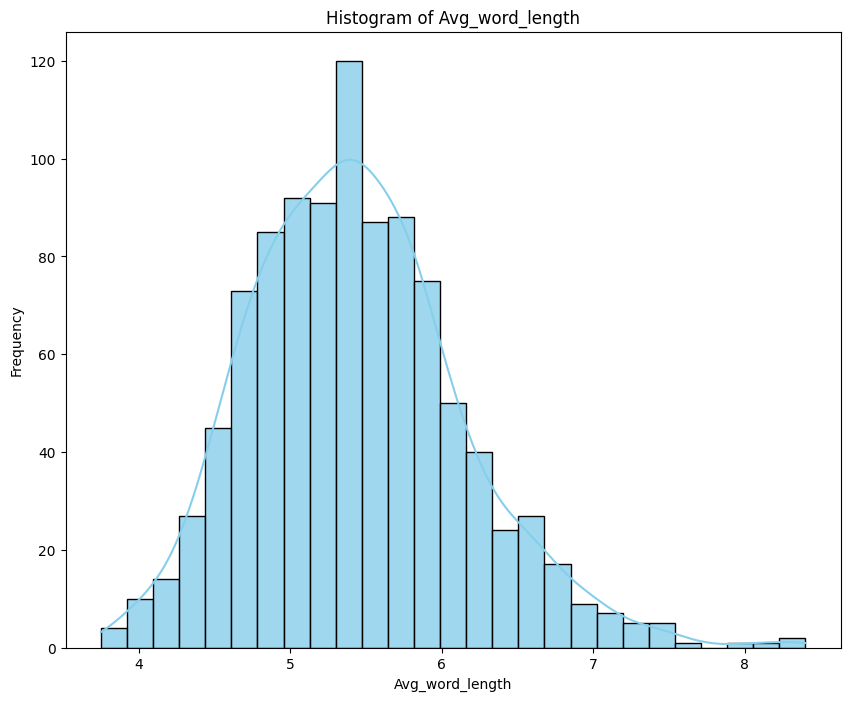

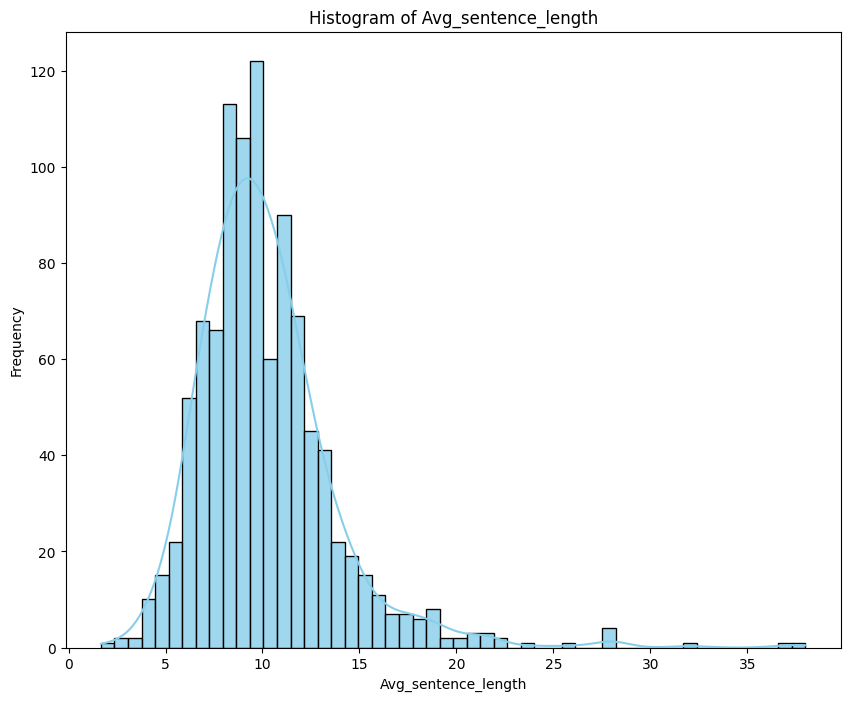

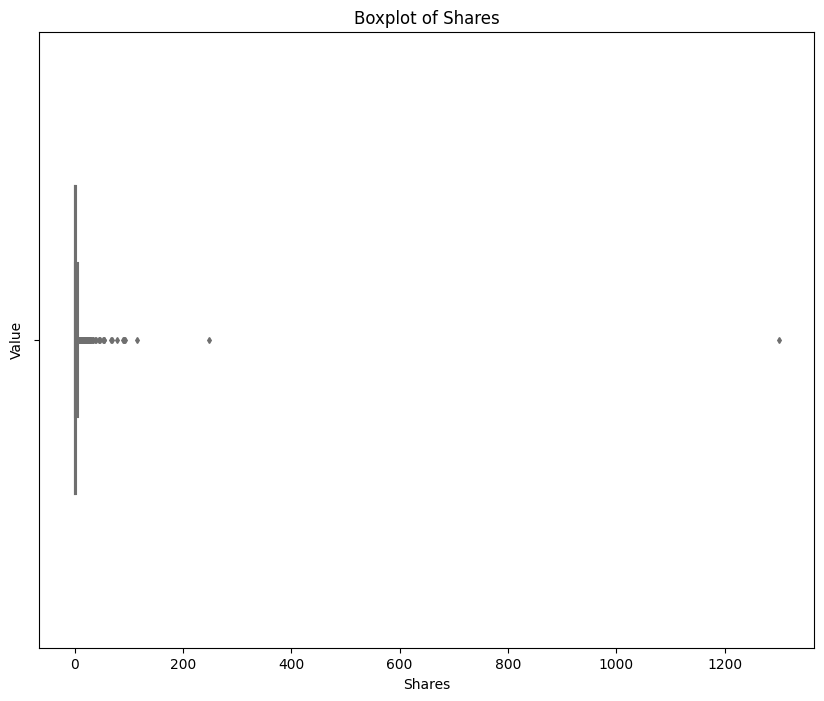

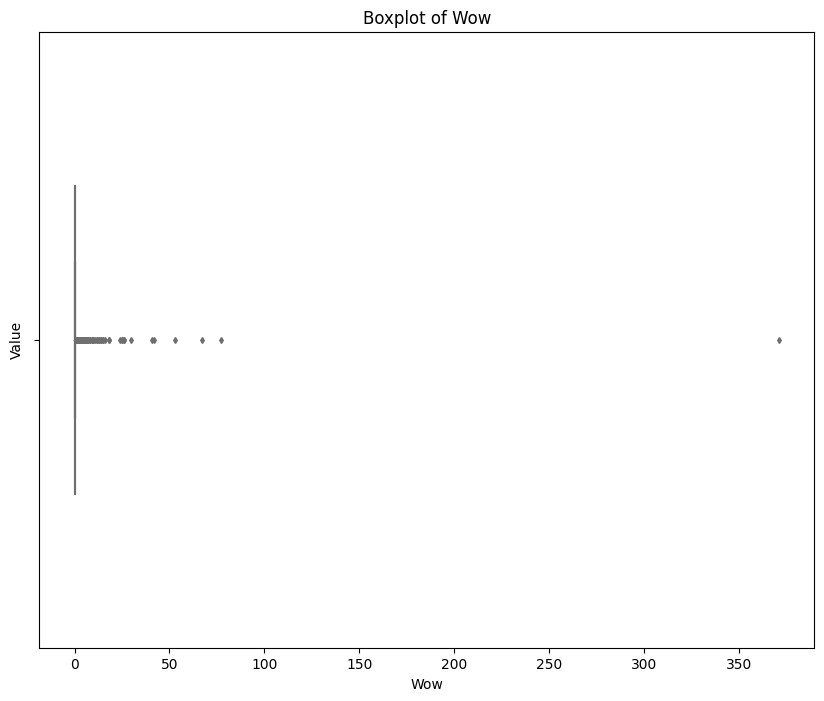

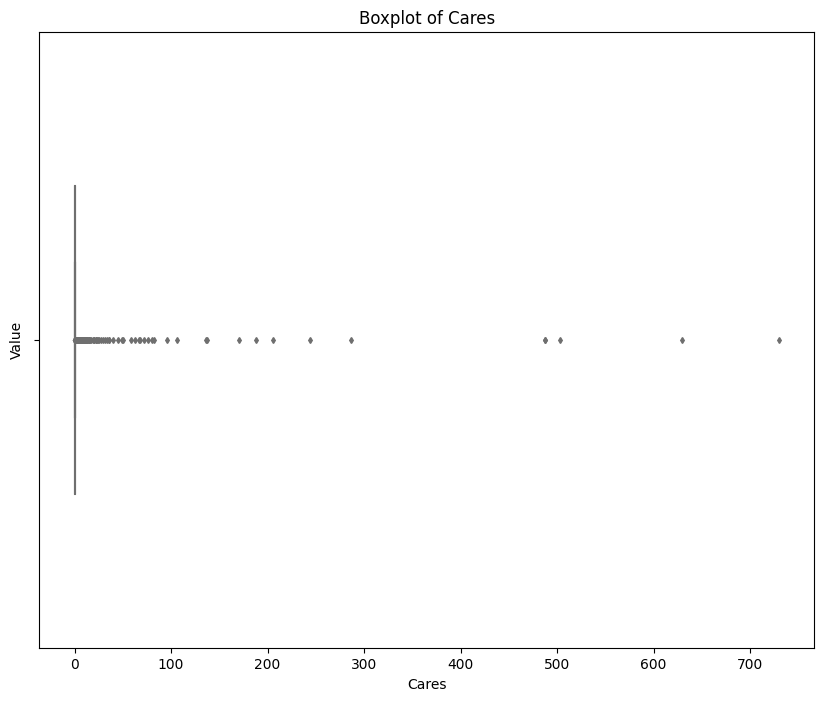

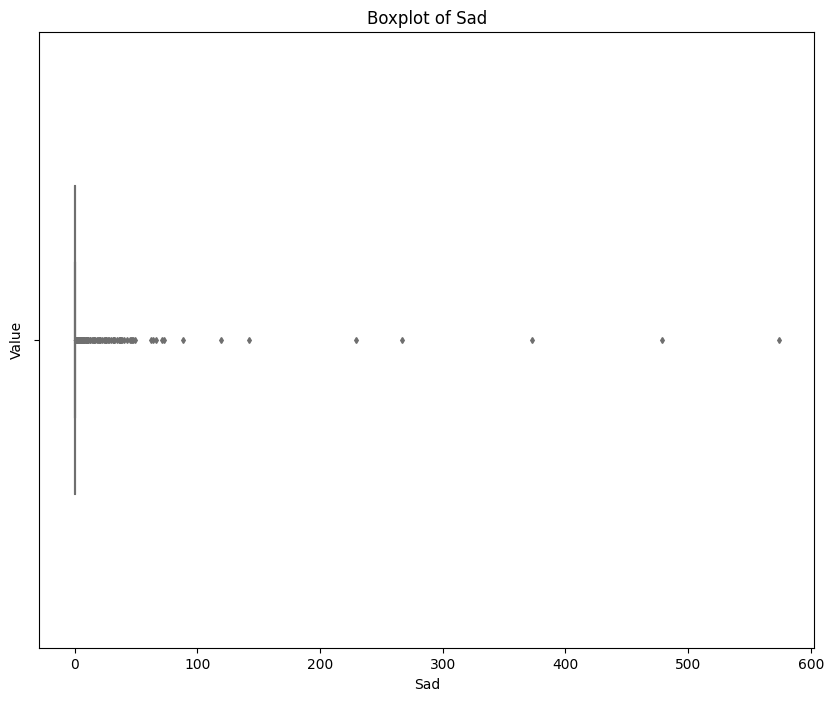

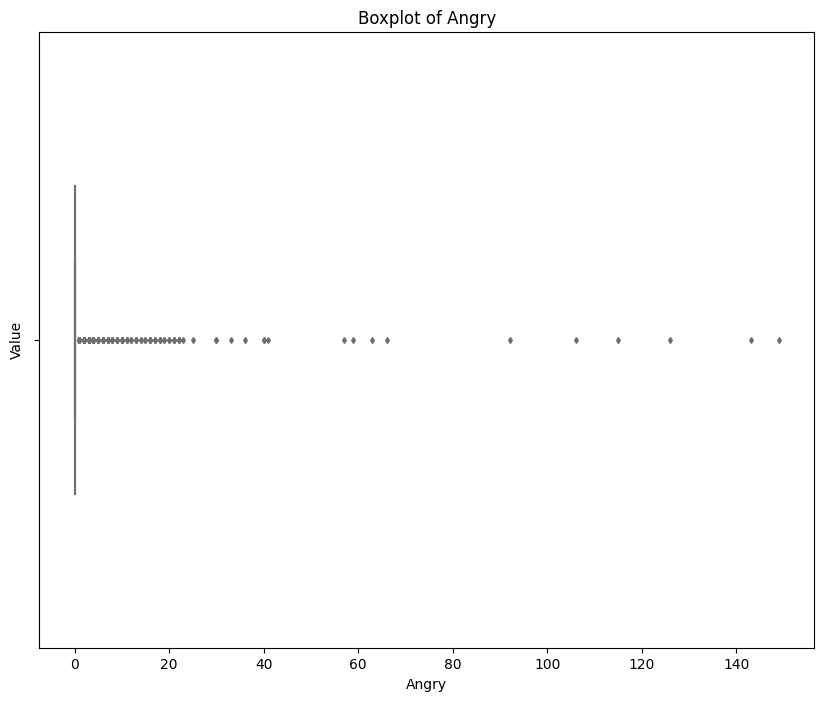

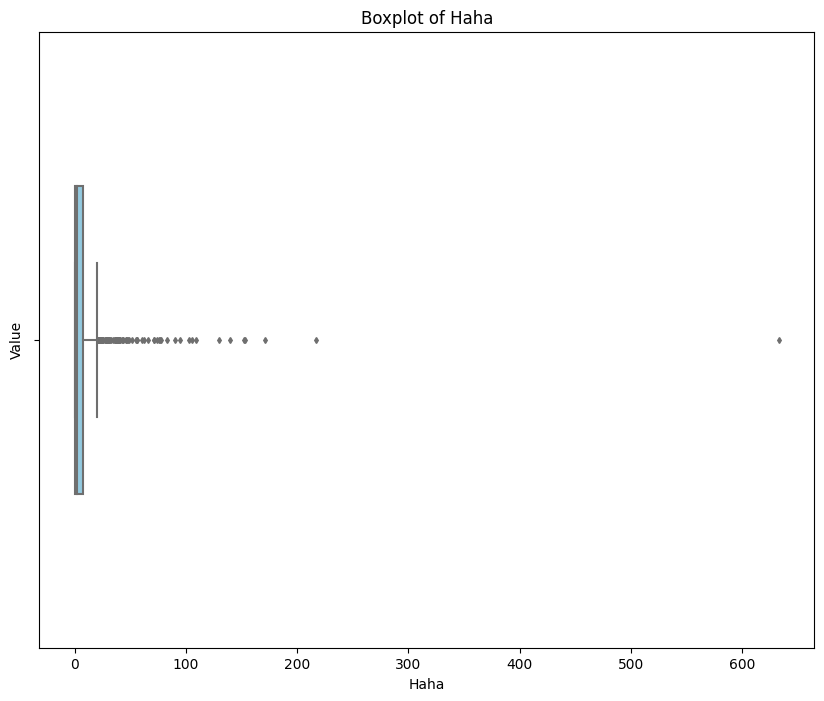

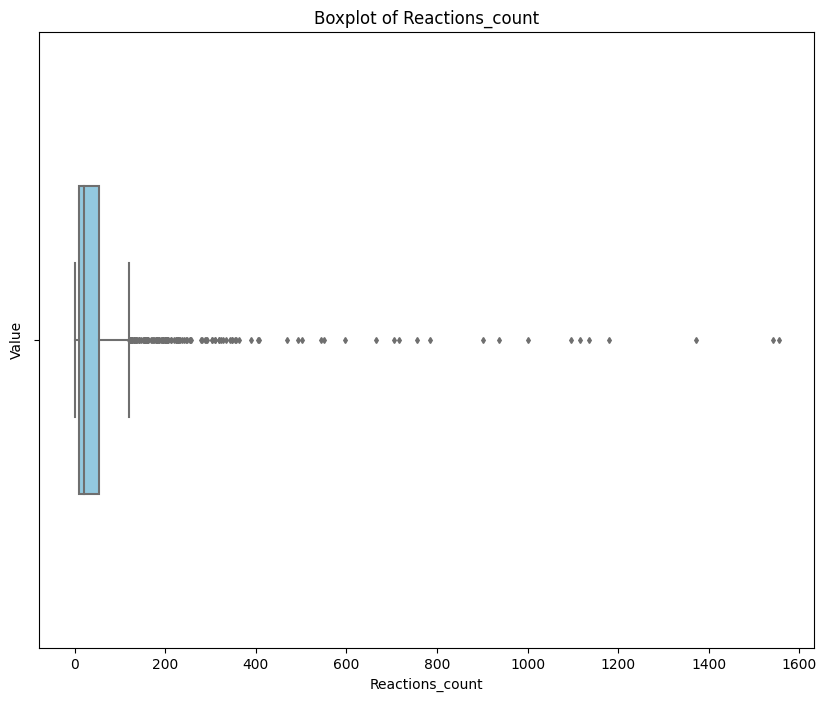

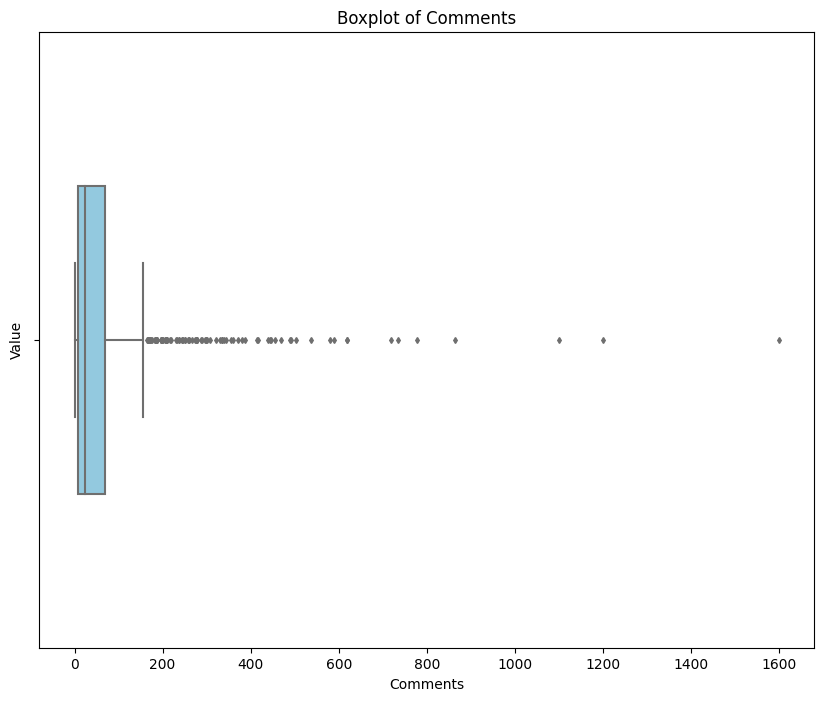

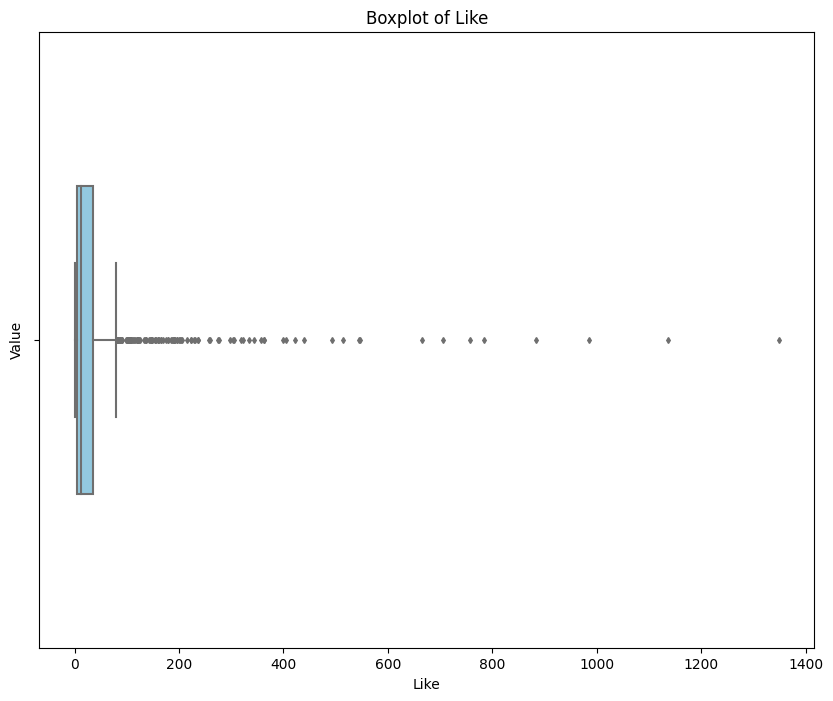

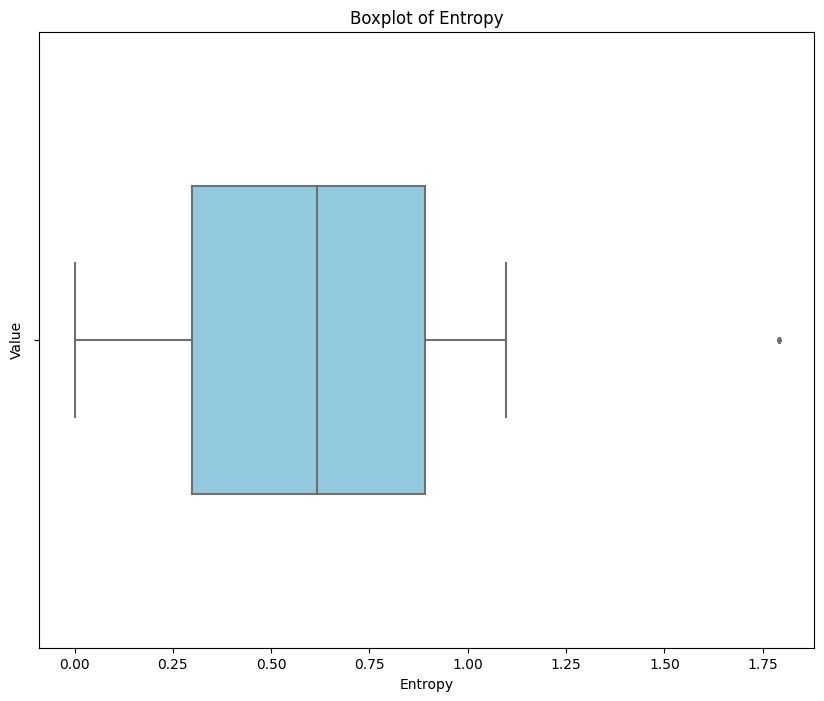

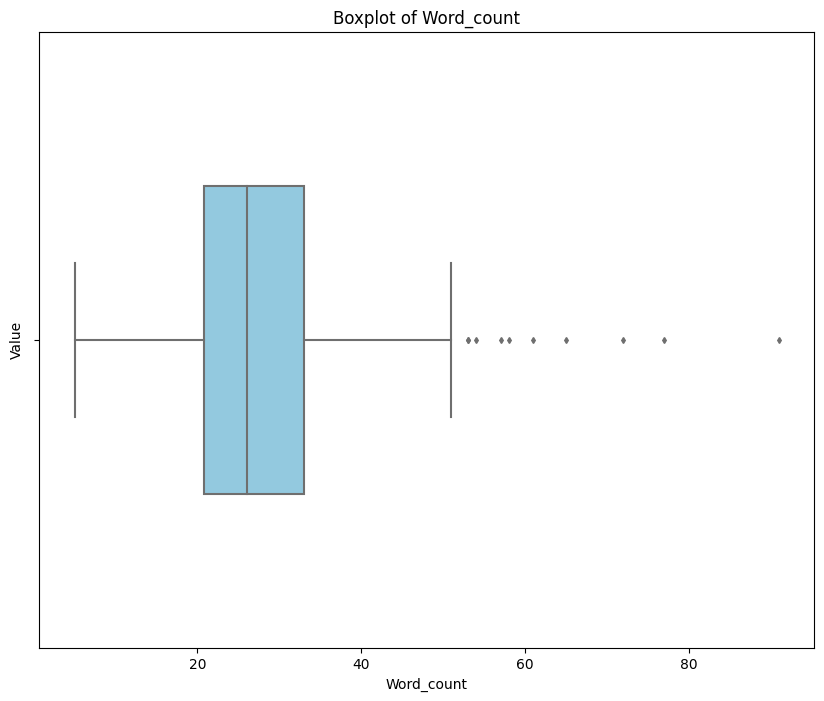

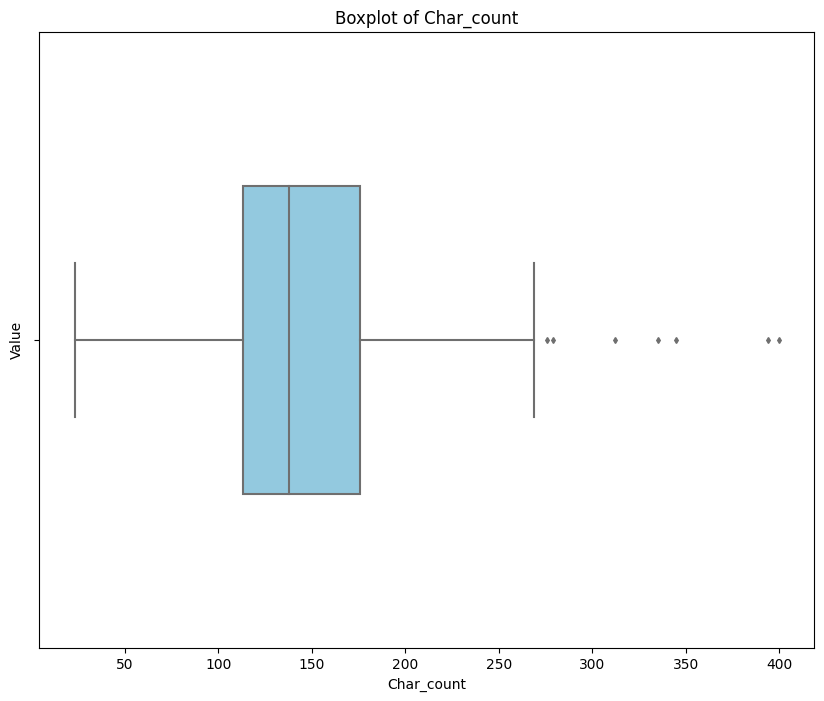

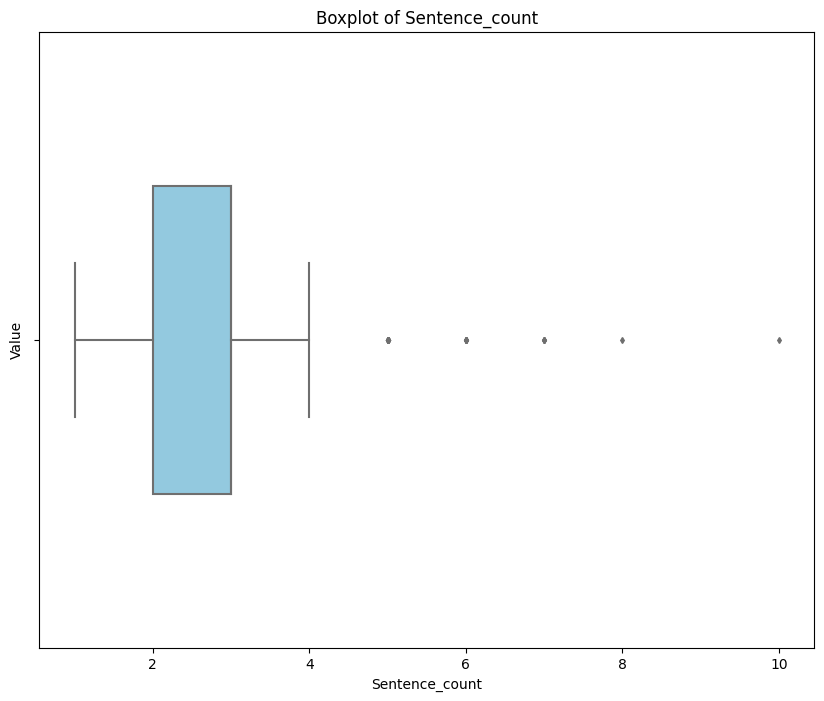

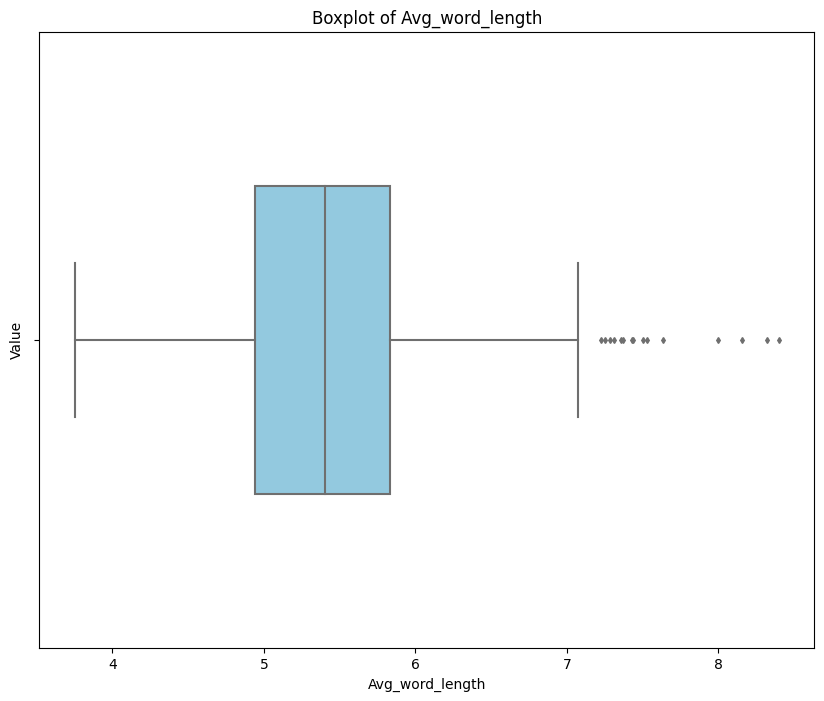

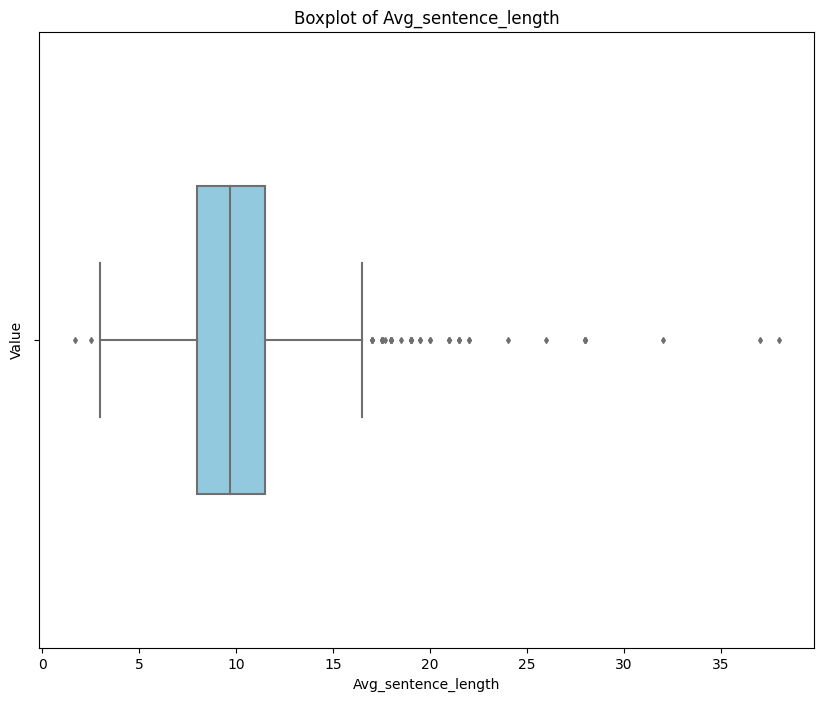

In [158]:
#df = df.apply(calculate_Entropy, axis=1)
descriptive_Entropy(df)
plot_descriptive_stats(df)

## Length analysis

## Append source name to the text

In [79]:
# Add source name to the end of the content
def append_source_name(df):
    """
    Appends the name of the source to the end of the content in the 'content' column of the DataFrame.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame with the 'name' and 'content' columns.
    
    Returns:
        pandas.DataFrame: The DataFrame with the updated 'content' column.
    """
    if pd.notnull(df['content']):
        return str(df['content']) + ' ' + df['name']
    else:
        return np.nan

In [80]:
df['content'] = df.apply(append_source_name, axis=1)

In [81]:
df['entropy'].count()

10000

## Save back to csv

In [82]:
df.to_csv('Indicator-Desc_DataNew.csv', index=False)
